# **Image Classification Using CNN**

In [81]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
from tensorflow import keras
from keras import preprocessing

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
train_dataset = '/kaggle/input/image-classification/seg_train/seg_train/'
test_dataset = '/kaggle/input/image-classification/seg_test/seg_test/'

In [52]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

**ImageDataGenerator** class ensures that the model receives new variations of the images at each epoch. But it only returns the transformed images and does not add it to the original corpus of images.

In [53]:
rescaled = ImageDataGenerator(1/255)

**image_dataset_from_directory** function. Generates a tf.data.Dataset from image files in a directory.

In [59]:
train_set = tf.keras.utils.image_dataset_from_directory(train_dataset, image_size=(128, 128), 
                                                        batch_size=32, label_mode='int',labels='inferred',
                                                       subset='training', validation_split=0.2, seed=42)
test_set = tf.keras.utils.image_dataset_from_directory(test_dataset, image_size=(128, 128),
                                                      batch_size=32, label_mode='int',labels='inferred',
                                                      subset='validation', validation_split=0.2, seed=42)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 3000 files belonging to 6 classes.
Using 600 files for validation.


**Sequential** The function will execute and create each model layer one by one. 
The input_shape is the argument of the sequential function that helps us define the layers that will be visible in the network

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2), #1st layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2), #2nd layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #3rd layer
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #4th layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

View the Model Summary

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 124, 124, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 122, 122, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 61, 61, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 61, 61, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 59, 59, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 57, 57, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 55, 55, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556,038 (2.12 MB)

 Trainable params: 556,038 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

**Complie** the Model using Adam Optimizers ***categorical_crossentropy***

In [30]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import h5py

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [33]:
model_checkpoint = ModelCheckpoint(filepath='/kaggle/working/my_model.keras', monitor='val_loss', 
                                   save_best_only=True)


In [34]:
lr_late = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1)

In [35]:
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [36]:
test_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [37]:
hist = model.fit(train_set, shuffle=True, epochs=25, validation_data=test_set,
                callbacks=[early_stop, model_checkpoint, lr_late], verbose=1)

Epoch 1/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.3094 - loss: 1.5926 - val_accuracy: 0.5517 - val_loss: 1.0699 - learning_rate: 0.0010
Epoch 2/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.5388 - loss: 1.0846 - val_accuracy: 0.4983 - val_loss: 1.1634 - learning_rate: 0.0010
Epoch 3/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.5919 - loss: 0.9773 - val_accuracy: 0.6067 - val_loss: 0.9398 - learning_rate: 0.0010
Epoch 4/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.6368 - loss: 0.8891 - val_accuracy: 0.5517 - val_loss: 1.0343 - learning_rate: 0.0010
Epoch 5/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.6963 - loss: 0.7979 - val_accuracy: 0.6867 - val_loss: 0.8689 - learning_rate: 0.0010
Epoch 6/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.7223 - loss: 0.7532 - val_accuracy: 0.7650 - val_loss: 0.6641 - learning_rate: 0.0010
Epoch 7/25
351/351 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.7436 - loss: 0.

Plotting The Results

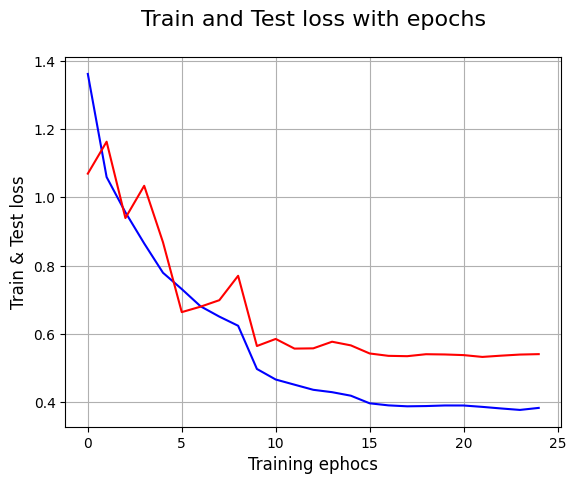

In [38]:
plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='red', label='train')
plt.grid(True)
plt.title('Train and Test loss with epochs\n', fontsize=16)
plt.xlabel('Training ephocs', fontsize=12)
plt.ylabel('Train & Test loss', fontsize=12)
plt.show();

Plotting results with accuracy

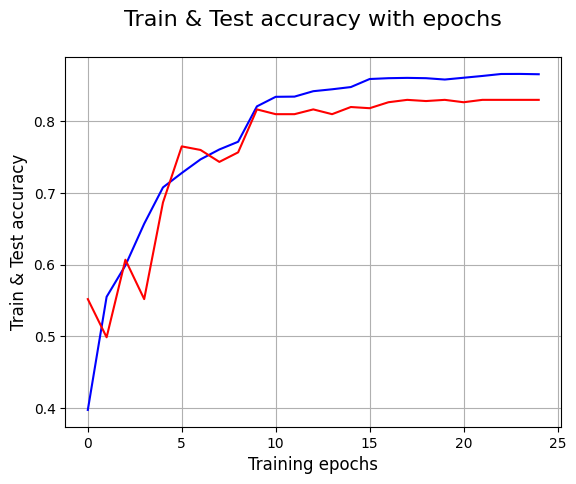

In [39]:
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='red', label='train')
plt.grid(True)
plt.title("Train & Test accuracy with epochs\n", fontsize=16)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Train & Test accuracy", fontsize=12)
plt.show();

In [40]:
acc = model.evaluate(test_set, steps=len(test_set), verbose=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.8310 - loss: 0.5108


In [42]:
class_names = train_set.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


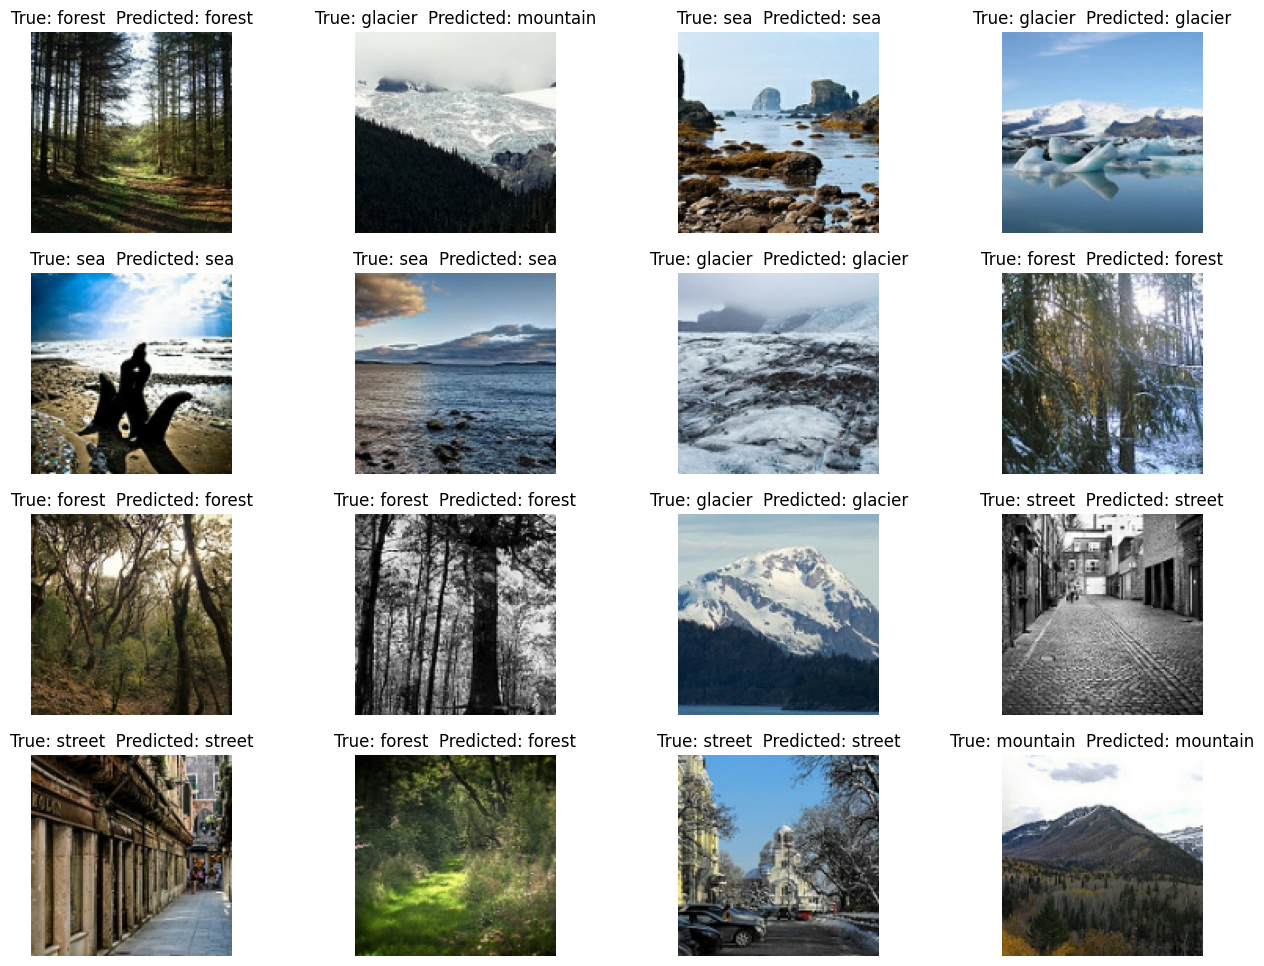

In [70]:
plt.figure(figsize=(16,12))

for images, labels in test_set.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'True: {class_names[labels[i]]}  Predicted: {class_names[predicted_classes[i]]}')
        plt.axis('off')


**Confusion Matrix**

In [83]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [72]:
predictions = np.array([])
labels = np.array([])
for X, y in test_set:
    predictions = np.concatenate([predictions, np.argmax(model.predict(X), axis=-1)])
    labels = np.concatenate([labels, y])
print(predictions)
print(labels)
print('Accuracy:', accuracy_score(predictions, labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
[5. 2. 0. 1. 3. 2. 4. 5. 0. 3. 1. 2. 3. 5. 1. 5. 1. 5. 3. 0. 3. 5. 5. 5.
 4. 1. 4. 1. 5. 1. 0. 5. 4. 0. 2. 2. 3. 5. 3. 4. 1. 4. 0. 4. 5. 3. 2. 2.
 2. 5. 4. 5. 1. 0. 0. 1. 2. 2. 3. 3. 2. 1. 4. 3. 1. 5. 5. 0. 4. 1. 2. 1.
 2. 2. 1. 5. 2. 5. 5. 0. 5. 1. 1. 2. 1. 

In [73]:
print('Classification Report: ', classification_report(predictions, labels))

Classification Report:                precision    recall  f1-score   support

         0.0       0.77      0.78      0.77        72
         1.0       0.96      0.96      0.96       100
         2.0       0.73      0.81      0.77       102
         3.0       0.86      0.75      0.80       128
         4.0       0.80      0.79      0.80        89
         5.0       0.84      0.89      0.87       109

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



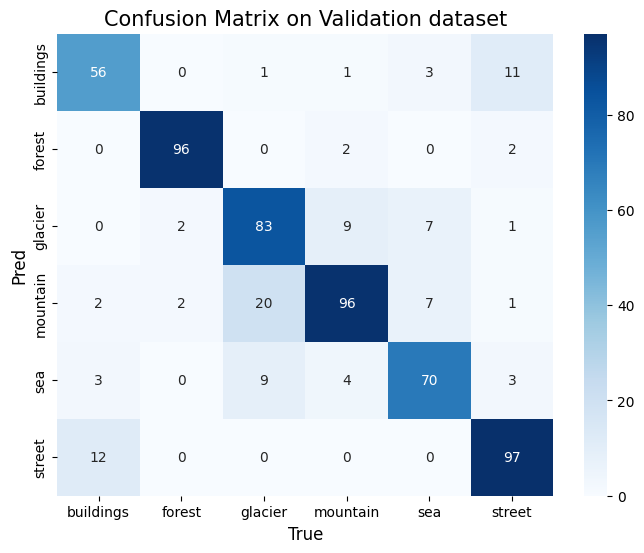

In [68]:
plt.figure(figsize=(8, 6))

sns.heatmap(
    confusion_matrix(predictions, labels),
    annot=True,
    fmt='.3g',
    xticklabels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
    yticklabels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
    cmap='Blues'
)

plt.title('Confusion Matrix on Validation dataset', fontsize=15)
plt.xlabel('True', fontsize=12)
plt.ylabel('Pred', fontsize=12)
plt.show()

**Prediction On Test Dataset**

In [86]:
test = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/image-classification/seg_pred/seg_pred/',
    labels=None,
    label_mode=None,
    color_mode='rgb',
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=42
)

Found 7301 files.


In [84]:
from keras.models import Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


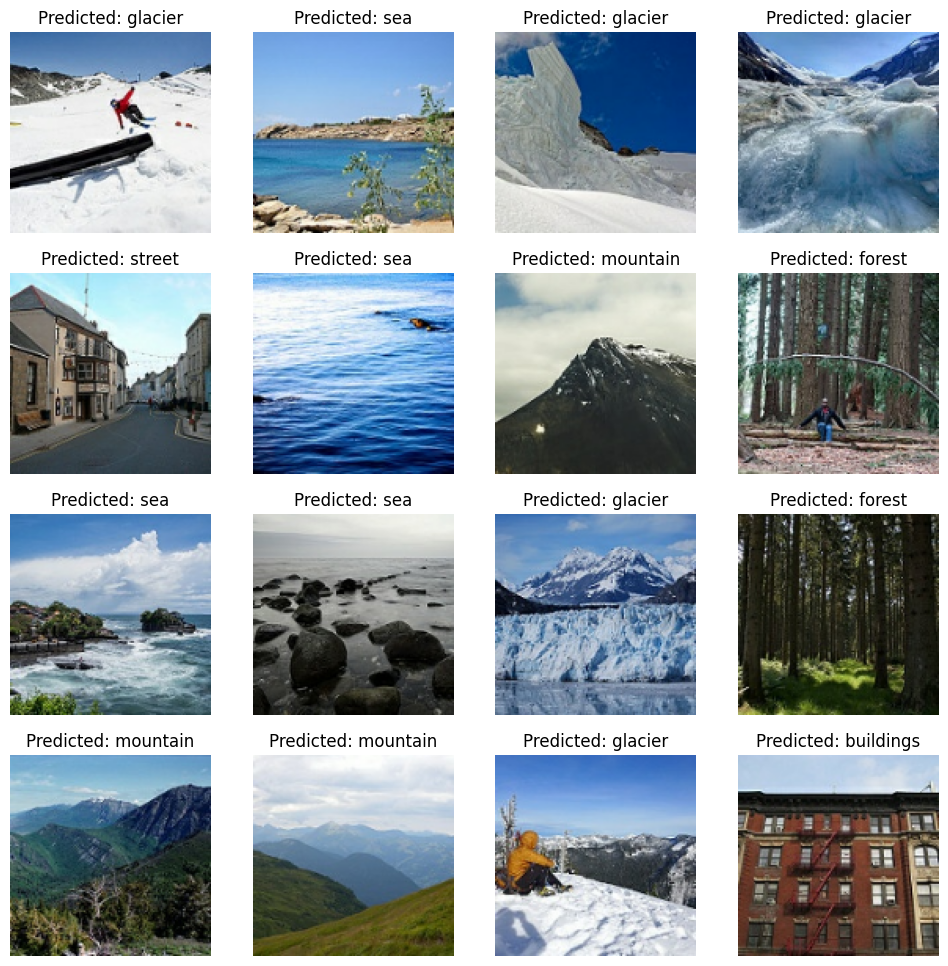

In [87]:
plt.figure(figsize=(12, 12))

for images in test.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'Predicted: {class_names[predicted_classes[i]]}')
        plt.axis('off')